# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [7]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

## Challenge 1

#### The data we will use in this challenge is:

In [5]:
x = np.arange(0,100)
y = x*2
z = x**2

In [17]:
display(x,y,z)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198])

array([   0,    1,    4,    9,   16,   25,   36,   49,   64,   81,  100,
        121,  144,  169,  196,  225,  256,  289,  324,  361,  400,  441,
        484,  529,  576,  625,  676,  729,  784,  841,  900,  961, 1024,
       1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849,
       1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916,
       3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225,
       4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776,
       5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569,
       7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604,
       9801])

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

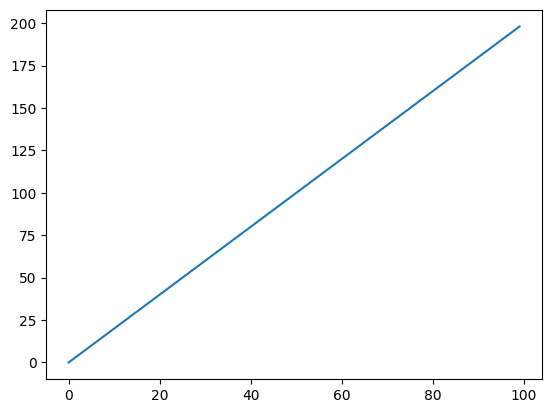

In [27]:
plt.plot(x, y)
plt.show()

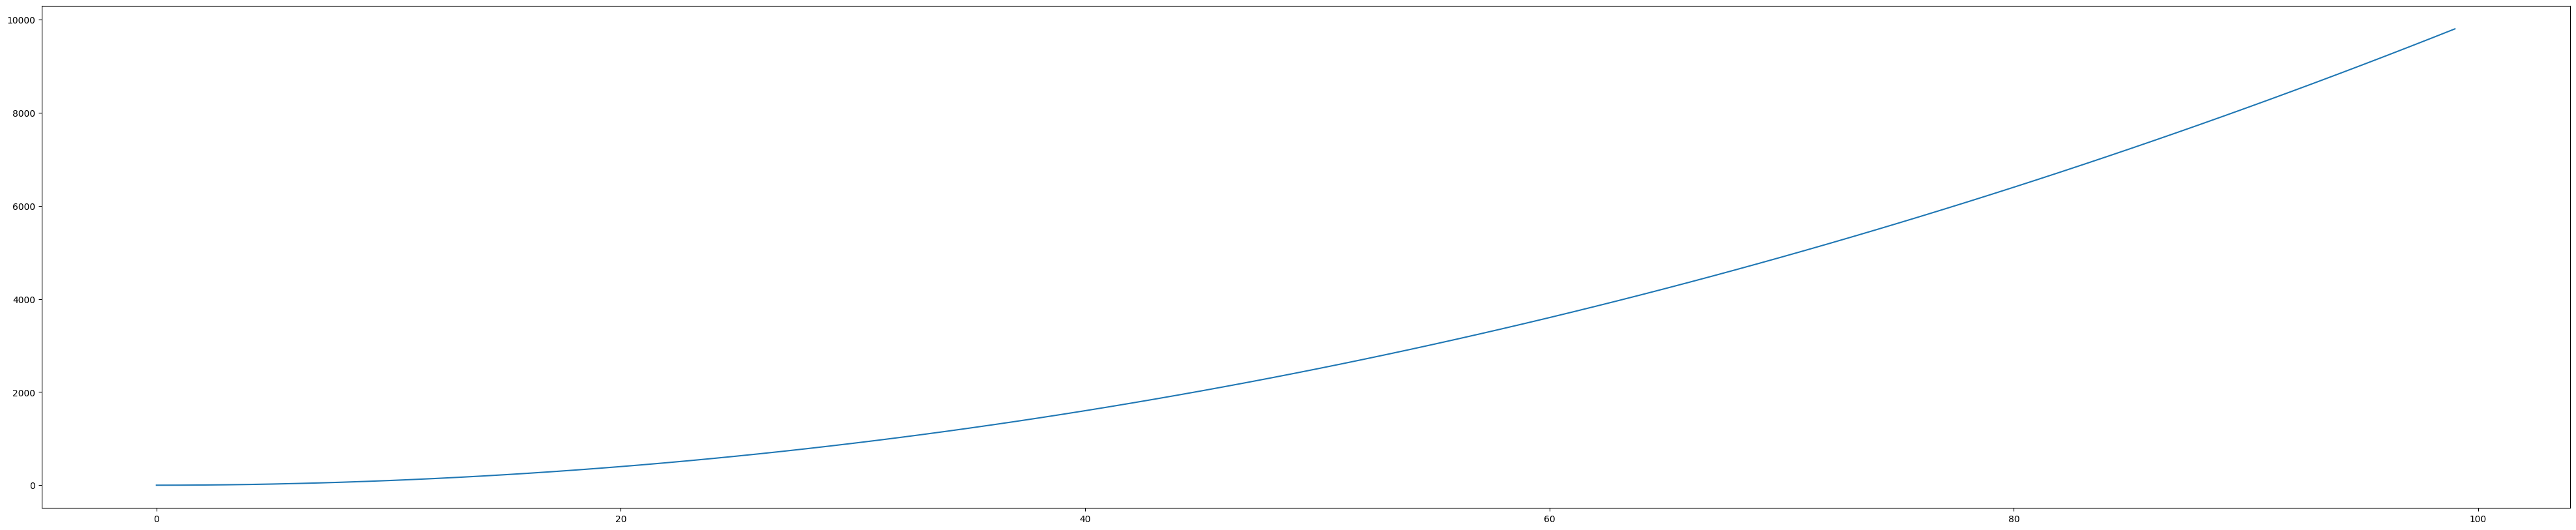

In [18]:
plt.figure(figsize=(50,10))
plt.plot(x, z)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

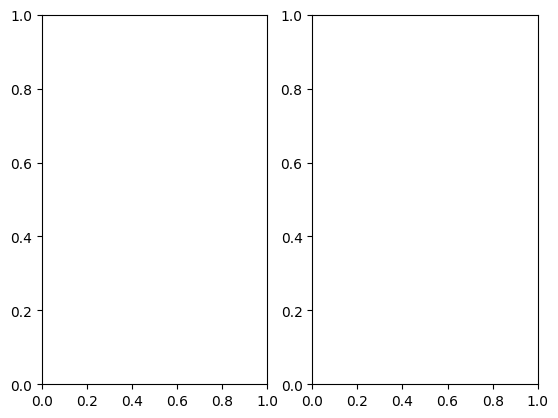

In [28]:
plt.subplots(nrows=1, ncols=2)
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

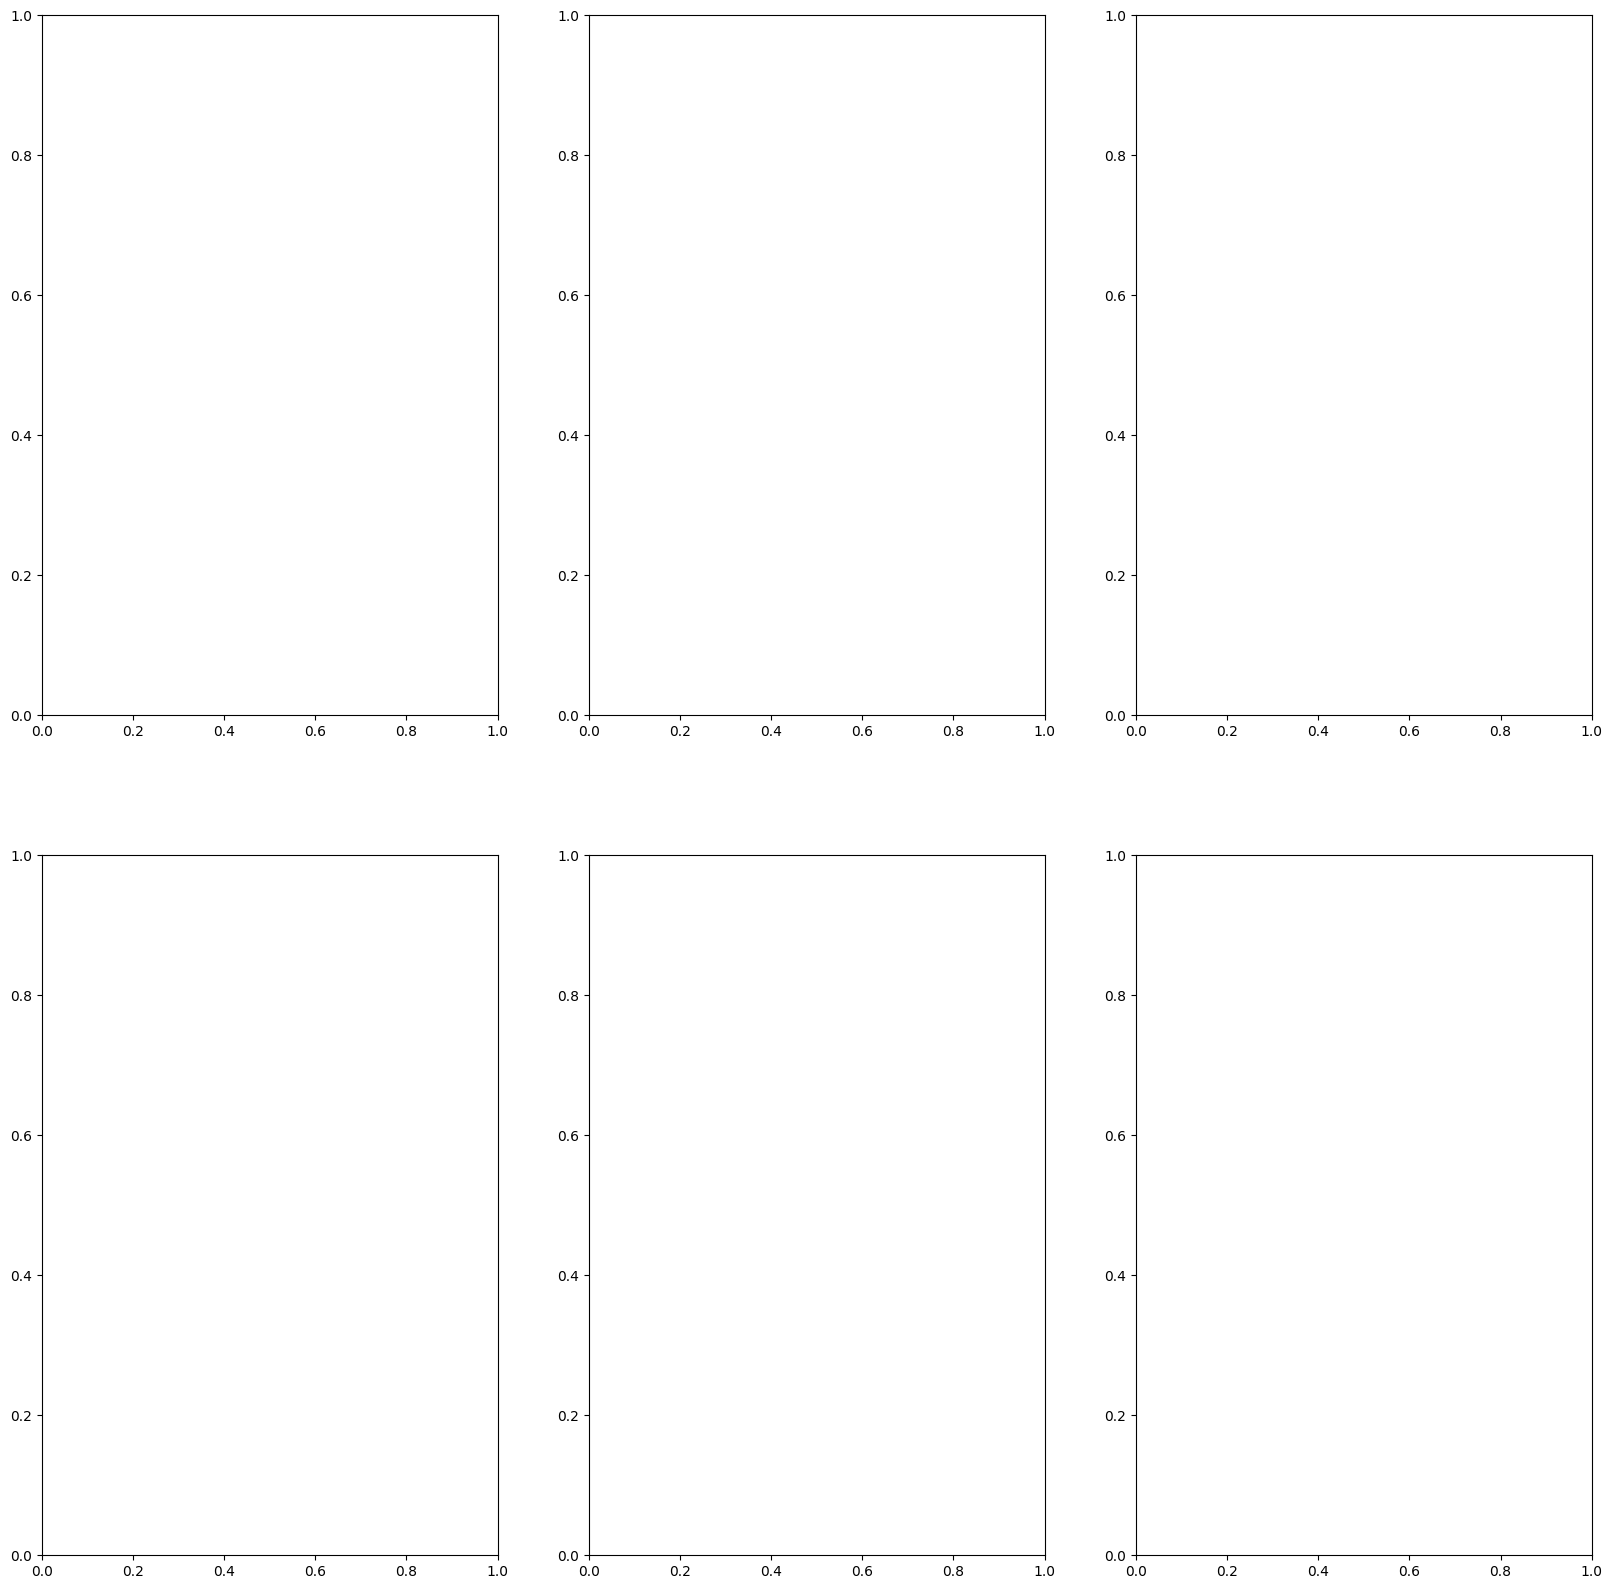

In [29]:
plt.subplots(nrows=2, ncols=3, figsize=(20,20))
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

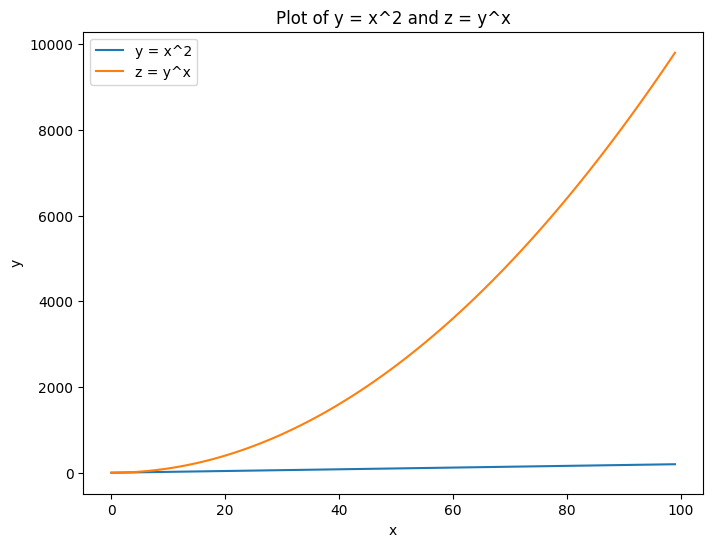

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = x^2')
plt.plot(x, z, label='z = y^x')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Plot of y = x^2 and z = y^x')

plt.legend()

plt.show()

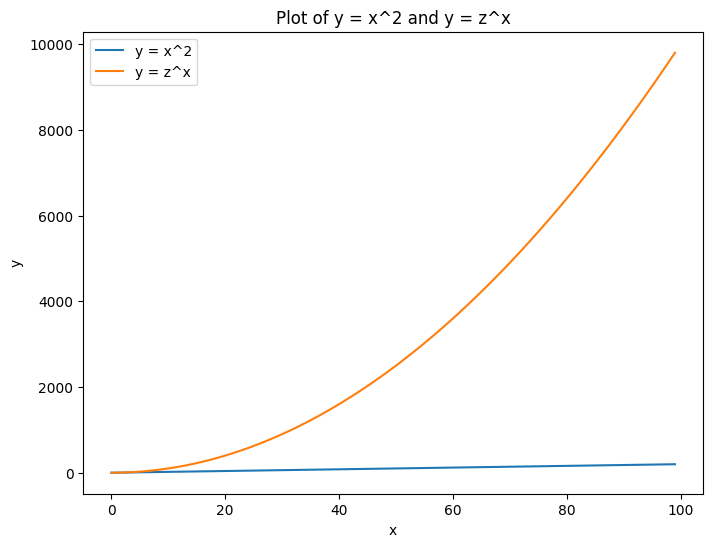

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = x^2')
plt.plot(x, z, label='y = z^x')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Plot of y = x^2 and y = z^x')

plt.legend()

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

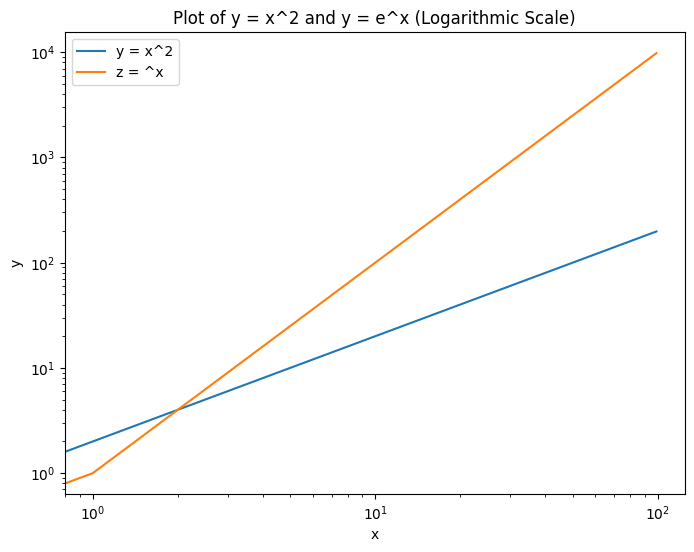

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = x^2')
plt.plot(x, z, label='z = ^x')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Plot of y = x^2 and y = e^x (Logarithmic Scale)')

plt.legend()

plt.xscale('log')
plt.yscale('log')

plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [37]:
fitbit = pd.read_csv("Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# Read CSV into a dataframe
df = pd.read_csv('Fitbit2.csv')
df.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


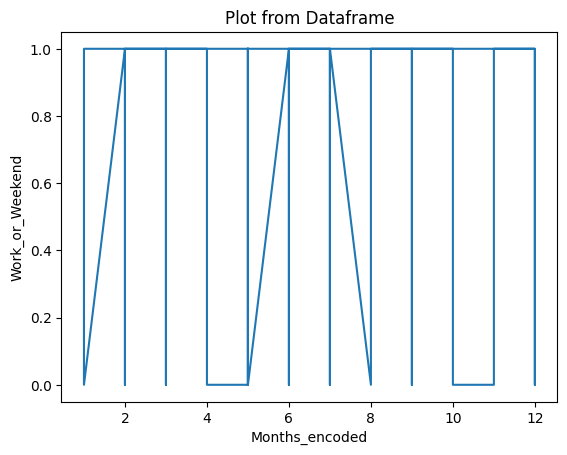

In [46]:
# Plot using dataframe
plt.plot(df['Months_encoded'], df['Work_or_Weekend'])
plt.xlabel('Months_encoded')
plt.ylabel('Work_or_Weekend')
plt.title('Plot from Dataframe')
plt.show()

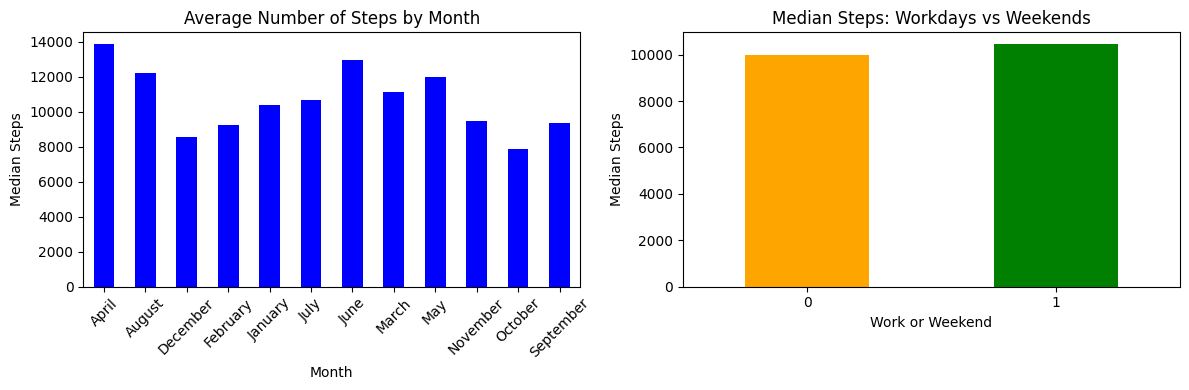

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Fitbit2.csv')

# Convert the 'Months_encoded' column to month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
df['Month'] = df['Months_encoded'].apply(lambda x: month_names[x - 1])

# Group the data by month and calculate the median steps
steps_by_month = df.groupby('Month')['Steps'].median()

# Group the data by 'Work_or_Weekend' and calculate the median steps
steps_by_work_weekend = df.groupby('Work_or_Weekend')['Steps'].median()

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the average number of steps by month
plt.sca(axes[0])
steps_by_month.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Median Steps')
plt.title('Average Number of Steps by Month')
plt.xticks(rotation=45)

# Plot the median steps on workdays and weekends
plt.sca(axes[1])
steps_by_work_weekend.plot(kind='bar', color=['orange', 'green'])
plt.xlabel('Work or Weekend')
plt.ylabel('Median Steps')
plt.title('Median Steps: Workdays vs Weekends')
plt.xticks(rotation=0)

# Adjust the layout
plt.tight_layout()

# Save the figure
plt.savefig("fitbit_steps.png")

# Show the plots
plt.show()


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

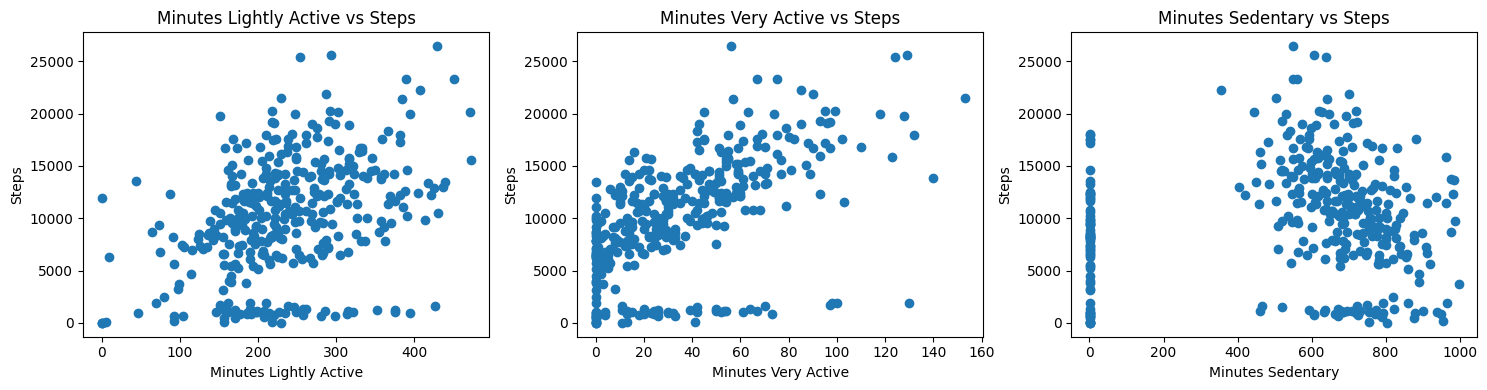

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Fitbit2.csv')

# Define the feature pairs
feature_pairs = [
    ('Minutes Lightly Active', 'Steps'),
    ('Minutes Very Active', 'Steps'),
    ('Minutes Sedentary', 'Steps')
]

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=len(feature_pairs), figsize=(15, 4))

# Loop over the feature pairs and plot scatter plots
for i, (x_feature, y_feature) in enumerate(feature_pairs):
    plt.sca(axes[i])
    plt.scatter(df[x_feature], df[y_feature])
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'{x_feature} vs {y_feature}')

# Adjust the layout
plt.tight_layout()

# Save the figure
plt.savefig('scatter_plots.png')

# Show the plots
plt.show()


## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [55]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [56]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [60]:
# NUMERICAL VARIABLES
numeric_cols = titanic.select_dtypes(include=['int64', 'float64'])
print(numeric_cols)

      PassengerId  Survived  Pclass        Age  SibSp  Parch      Fare
0               1       0.0       3  22.000000      1      0    7.2500
1               2       1.0       1  38.000000      1      0   71.2833
2               3       1.0       3  26.000000      0      0    7.9250
3               4       1.0       1  35.000000      1      0   53.1000
4               5       0.0       3  35.000000      0      0    8.0500
...           ...       ...     ...        ...    ...    ...       ...
1304         1305       NaN       3  29.513190      0      0    8.0500
1305         1306       NaN       1  39.000000      0      0  108.9000
1306         1307       NaN       3  38.500000      0      0    7.2500
1307         1308       NaN       3  29.513190      0      0    8.0500
1308         1309       NaN       3  25.315435      1      1   22.3583

[1309 rows x 7 columns]


In [61]:
# CATEGORICAL VARIABLES
categorical_cols = titanic.select_dtypes(include=['object', 'bool'])
print(categorical_cols)

                                                   Name  Gender  \
0                               Braund, Mr. Owen Harris    male   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                                Heikkinen, Miss. Laina  female   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                              Allen, Mr. William Henry    male   
...                                                 ...     ...   
1304                                 Spector, Mr. Woolf    male   
1305                       Oliva y Ocana, Dona. Fermina  female   
1306                       Saether, Mr. Simon Sivertsen    male   
1307                                Ware, Mr. Frederick    male   
1308                           Peter, Master. Michael J    male   

                  Ticket Cabin Embarked  
0              A/5 21171    U0        S  
1               PC 17599   C85        C  
2       STON/O2. 3101282    U0        S  
3                 113803  C

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

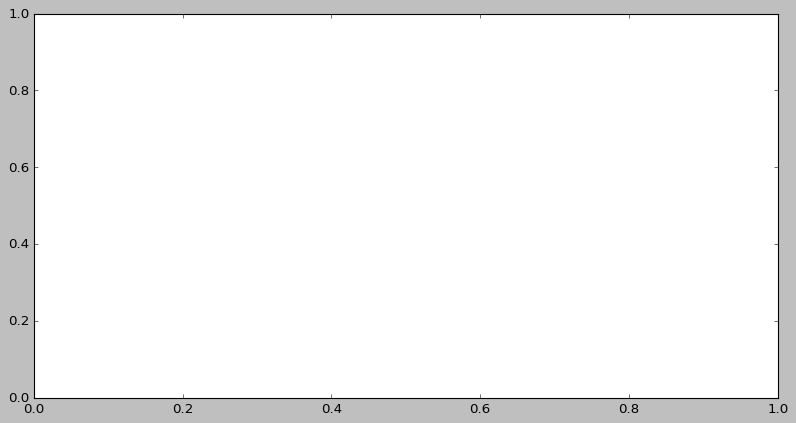

In [64]:
import matplotlib.pyplot as plt

plt.style.use('classic')
fig, ax = plt.subplots(figsize=(12, 6))
plt.show()


#### Use the right visulalization to show the distribution of column `Age`.

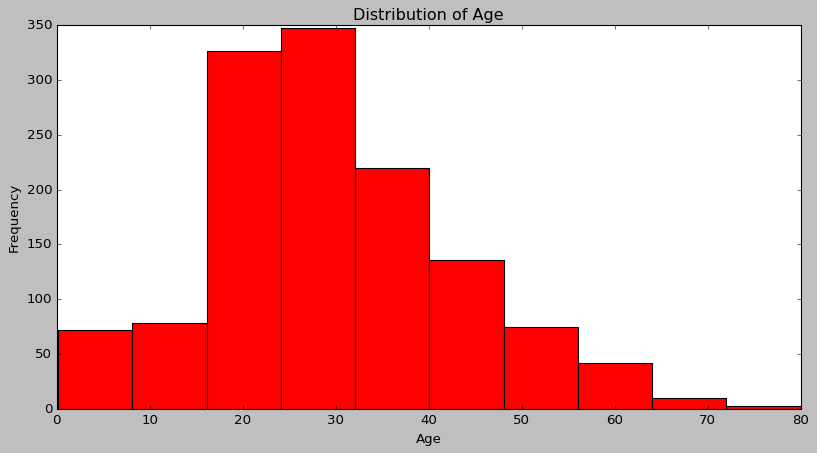

In [73]:
plt.style.use('classic')
plt.figure(figsize=(12, 6)) 
plt.hist(titanic['Age'], color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

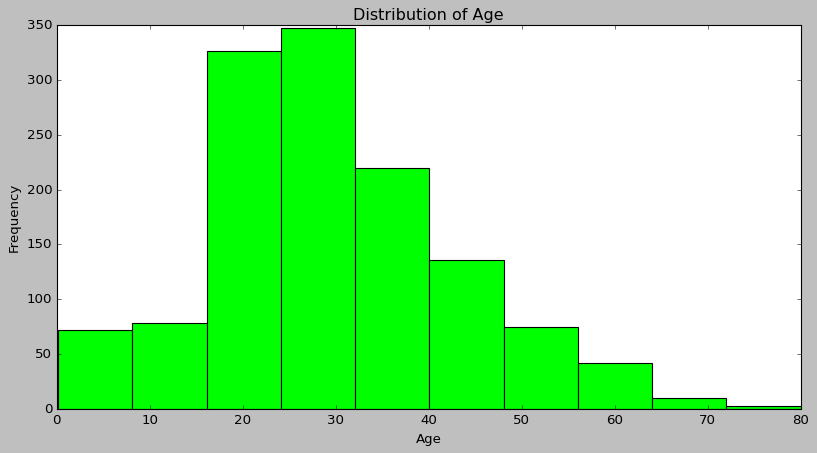

In [77]:
plt.style.use('classic')
plt.figure(figsize=(12, 6)) 
plt.hist(titanic['Age'], bins=10, color='lime')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

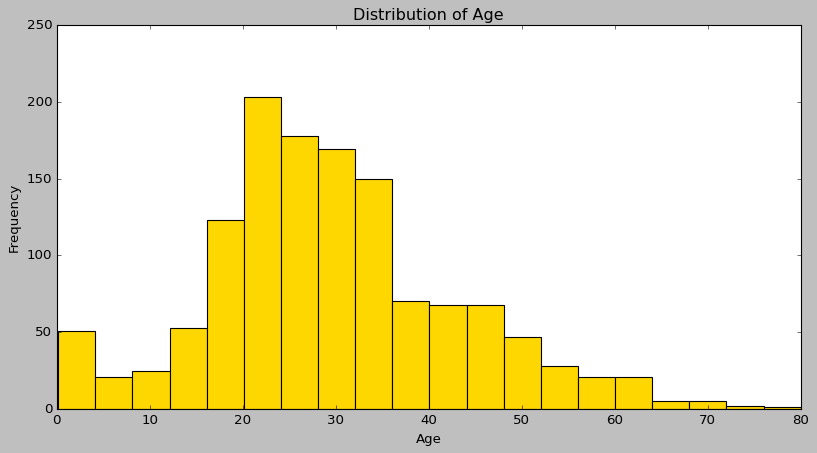

In [78]:
plt.style.use('classic')
plt.figure(figsize=(12, 6)) 
plt.hist(titanic['Age'], bins=20, color='gold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

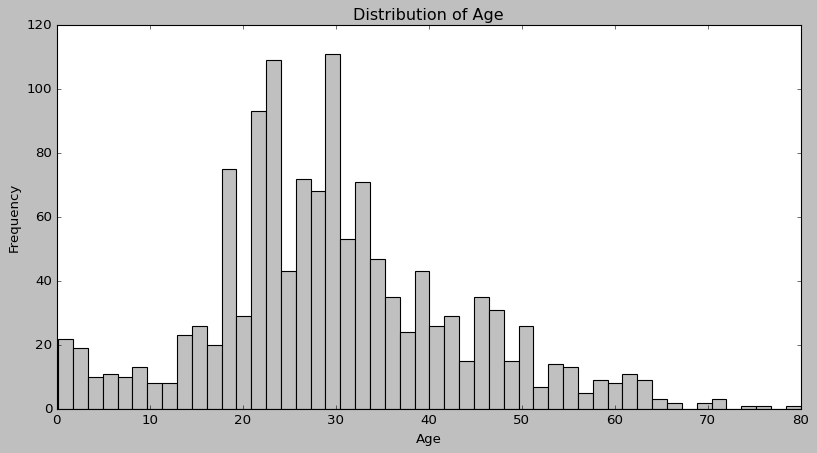

In [79]:
plt.style.use('classic')
plt.figure(figsize=(12, 6)) 
plt.hist(titanic['Age'], bins=50, color='silver')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
More bins is more precised data (more columns), less bins is less precise data (more visual at a single glance)
"""

#### Use seaborn to show the distribution of column `Age`.

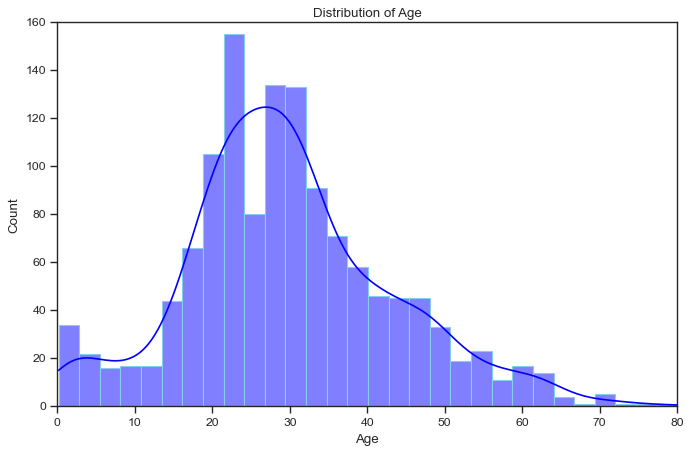

In [101]:
sns.set(style='ticks') 
plt.figure(figsize=(10, 6)) 
sns.histplot(data=titanic, x='Age', kde=True, color='blue', edgecolor='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

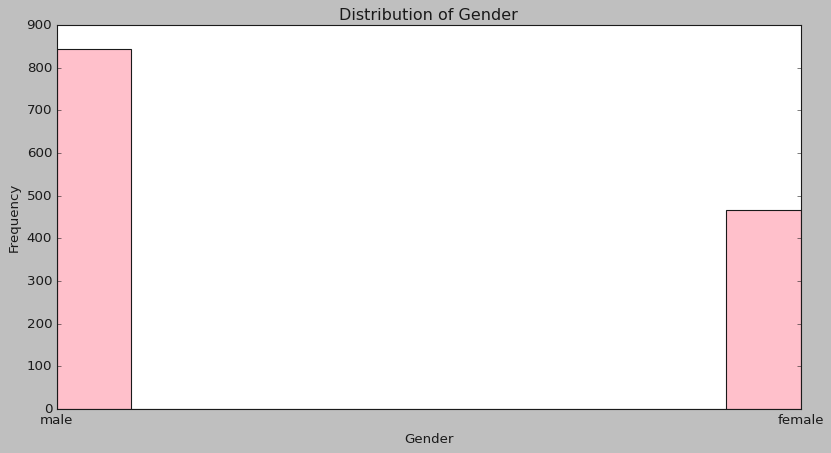

In [102]:
# Method 1 - matplotlib
plt.style.use('classic')
plt.figure(figsize=(12, 6)) 
plt.hist(titanic['Gender'], color='pink')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

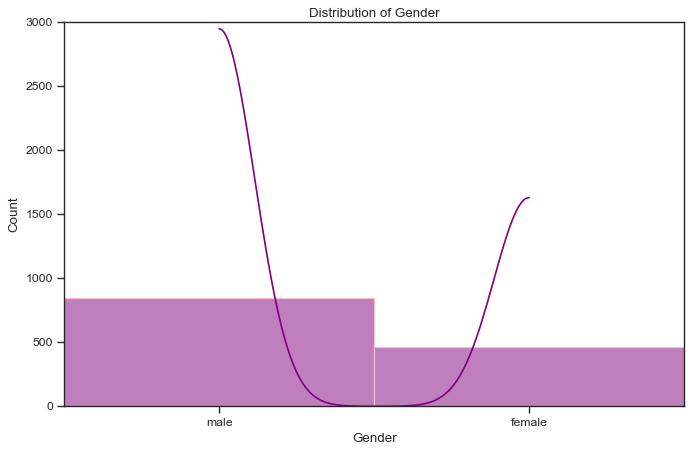

In [103]:
# Method 2 - seaborn
sns.set(style='ticks') 
plt.figure(figsize=(10, 6)) 
sns.histplot(data=titanic, x='Gender', kde=True, color='purple', edgecolor='pink')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

#### Use the right plot to visualize the column `Pclass`.

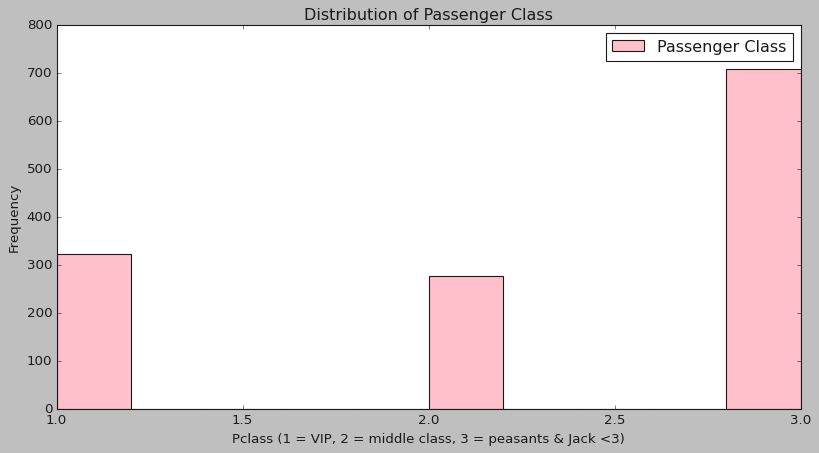

In [110]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12, 6)) 
plt.hist(titanic['Pclass'], color='pink', label='Passenger Class')
plt.legend()
plt.xlabel('Pclass (1 = VIP, 2 = middle class, 3 = peasants & Jack <3)')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Class')
plt.show()

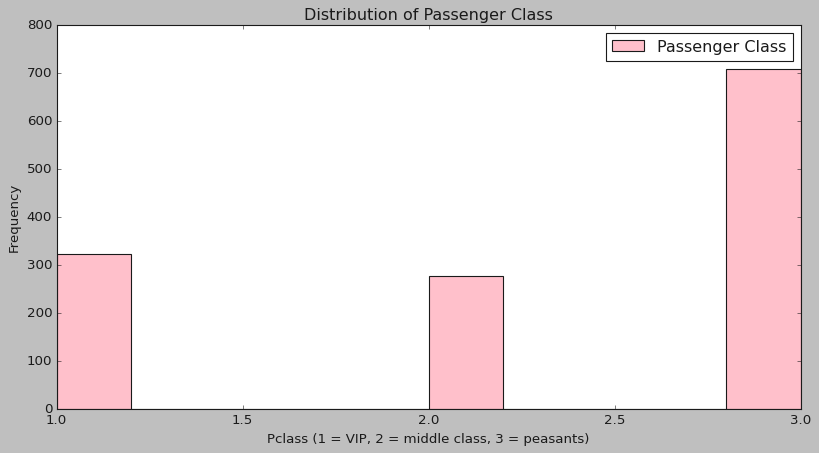

In [108]:
plt.style.use('classic')
plt.figure(figsize=(12, 6)) 
plt.hist(titanic['Pclass'], color='pink', label='Passenger Class')
plt.legend()
plt.xlabel('Pclass (1 = VIP, 2 = middle class, 3 = peasants)')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Class')
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

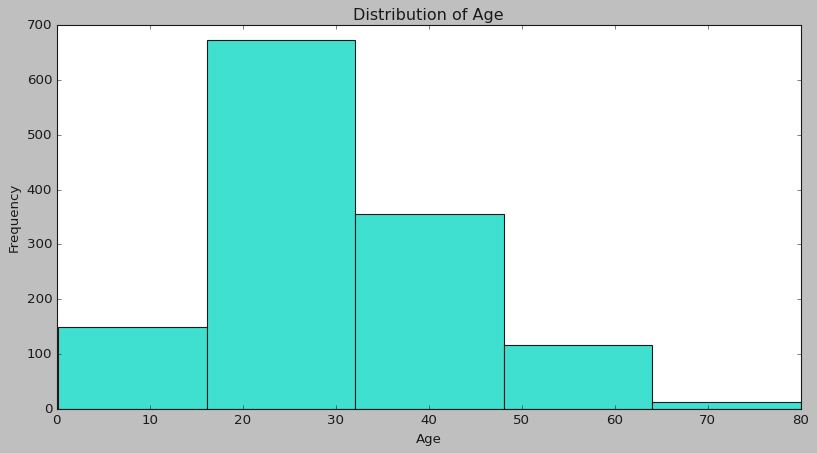

In [132]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12, 6)) 
plt.hist(titanic['Age'], bins=5, color='turquoise')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [ ]:
"""
A bar classic plot with a small bin size so the data is visible at a glance.
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
That most of the passengers were in their 20-30s, exactly 51.4%
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

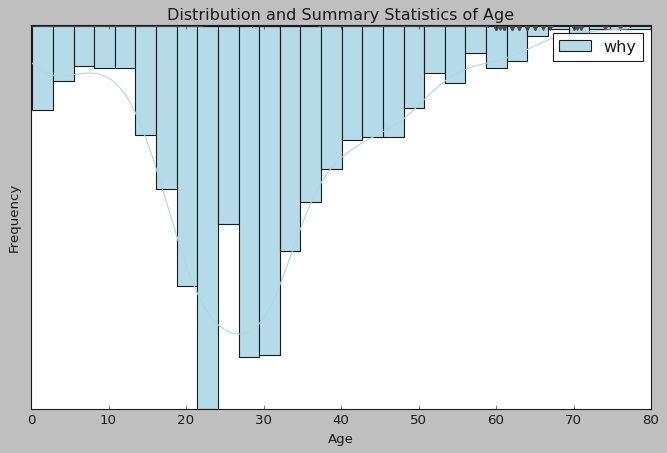

In [142]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=titanic, x='Age')
plt.title('Distribution and Summary Statistics of Age')

sns.histplot(data=titanic, x='Age', color='lightblue', kde=True, alpha=0.9, label="why")

plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
That most of the passengers were less than 25?
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

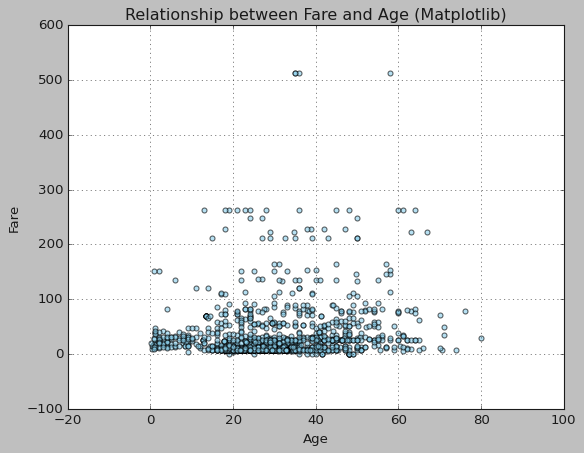

In [145]:
# Method 1 - matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(titanic['Age'], titanic['Fare'], color='skyblue', alpha=0.6, edgecolors='black')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship between Fare and Age (Matplotlib)')
plt.grid(True)
plt.show()


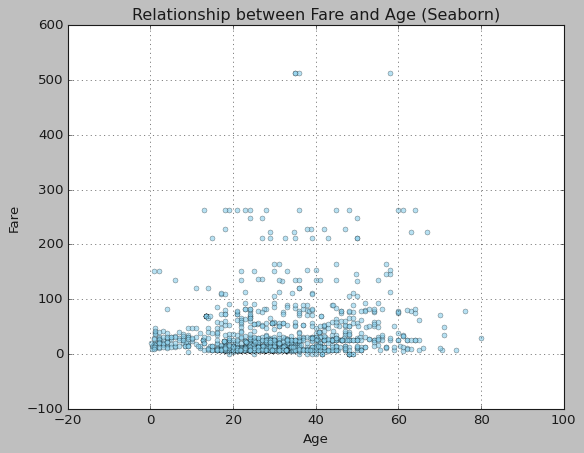

In [146]:
# Method 2 - seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=titanic, x='Age', y='Fare', color='skyblue', alpha=0.6, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship between Fare and Age (Seaborn)')
plt.grid(True)
plt.show()

#### Plot the correlation matrix using seaborn.

In [149]:
titanic.shape

(1309, 12)

C:\Users\jsctr\AppData\Local\Temp\ipykernel_3332\3203740072.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic.corr()


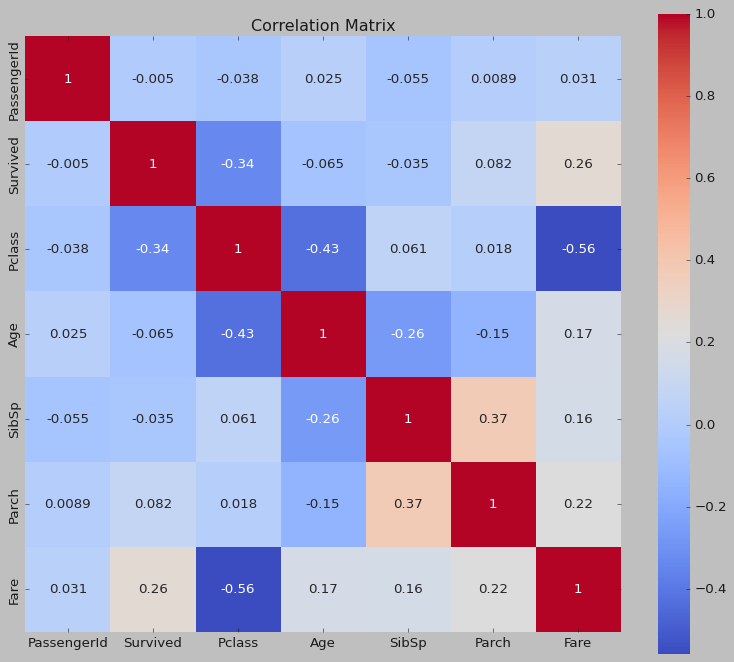

In [158]:
corr_matrix = titanic.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


#### What are the most correlated features?

In [ ]:
"""
The fare of the ticket along the passenger class, directly proporcional
After that, age and passenger class, so older passengers were from higher classes
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

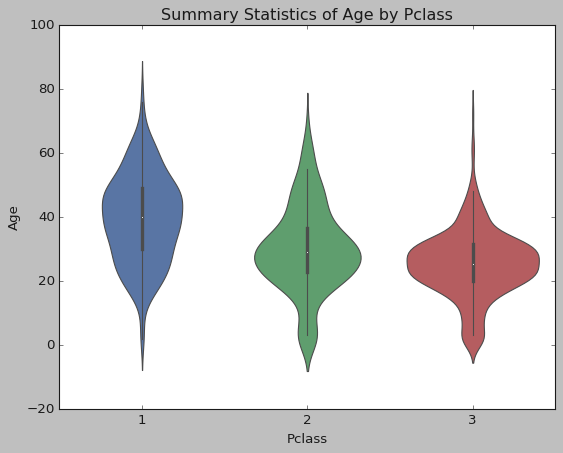

In [164]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=titanic, x='Pclass', y='Age')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Summary Statistics of Age by Pclass')
plt.show()


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

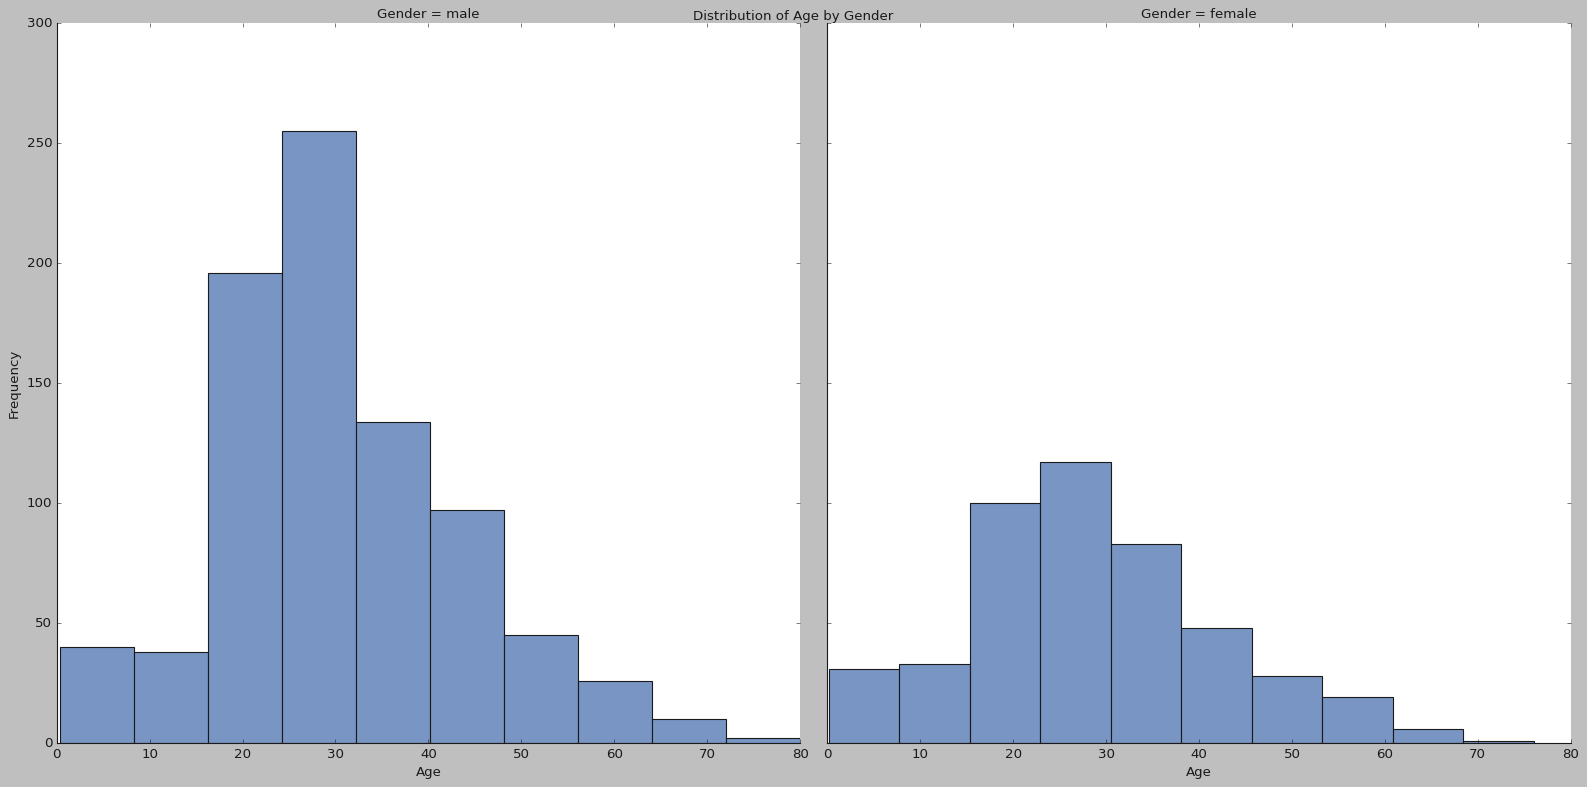

In [168]:
g = sns.FacetGrid(data=titanic, col='Gender', height=10)
g.map(sns.histplot, 'Age', bins=10)
g.set_xlabels('Age')
g.set_ylabels('Frequency')
g.fig.suptitle('Distribution of Age by Gender')
plt.show()
